<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1
#### Nicolás Sewrjugin


# Introducción

En este trabajo, se analizó el comportamiento de sistemas lineales e invariantes en el tiempo (LTI) definidos mediante ecuaciones en diferencias. Este tipo de sistema permite predecir la salida de cualquier señal de entrada, a través de sus ecuaciones directamente o de la respuesta al impulso.

Se consideraron sistemas discretos cuya relación entre la señal de entrada $x[n]$ y la señal de salida $y[n]$ está dada por ecuaciones en diferencias de la forma:

\begin{equation}
y[n] = \sum_{k=0}^{M} b_k x[n-k] - \sum_{k=1}^{N} a_k y[n-k]
\end{equation}

donde los coeficientes $b_k$ corresponden a la contribución de la entrada y $a_k$ a la retroalimentación de la salida. Este tipo de representación permite estudiar el sistema tanto en el dominio temporal como en el dominio de la frecuencia.

El objetivo principal del trabajo fue:
- Graficar la señal de salida $y[n]$ para distintas señales de entrada generadas previamente, considerando todas las señales como causales.
- Calcular la respuesta al impulso $h[n]$ de los distintos sistemas y, usando convolución, verificar la salida obtenida con diferentes entradas en algunos casos.

Las señales de entrada tratadas incluyeron funciones senoidales, moduladas, amplificadas, recortadas, cuadradas y pulsos rectangulares. Esto permite observar cómo diferentes tipos de excitaciones afectan la salida de un sistema LTI.


# Análisis y desarrollo

En primer lugar, se utilizó el siguiente sistema LTI:
\begin{equation}
y[n] = 3 \cdot 10^{-2} \cdot x[n] + 5 \cdot 10^{-2} \cdot x[n-1] + 3 \cdot 10^{-2} \cdot x[n-2] + 1.5 \cdot y[n-1] - 0.5 \cdot y[n-2]
\end{equation}

Se utilizaron las señales de la *TSI* como entrada para calcular sus respectivas salidas:

- Senoidal: frecuencia 2 kHz y amplitud *1*.
- Senoidal Amplificada: frecuencia 2kHz, amplitud *4*, desfase *$\pi/2$*.
- Modulada: senoidal de 2 kHz modulada en amplitud por una de 1 kHz.
- Recortada: señal senoidal de 2 kHz limitada a un 75\% de su potencia original.
- Cuadrada: señal cuadrada de 4 kHz.
- Pulso rectangular: pulso de 10 ms dentro del intervalo total de simulación.

La salida de cada señal se calculó aplicando directamente la ecuación en diferencias mediante la función *lfilter*, indicando los coeficientes correspondientes.  

Los gráficos de las salidas muestran cómo el sistema atenúa o amplifica ciertas componentes de la señal, introduce retardos y suaviza transitorios. La frecuencia de muestreo utilizada fue $f_s = 40$ kHz y la duración de la simulación corresponde a $N/f_s$, con $N=1000$ muestras.  

Se calculó la potencia de cada señal de salida mediante:
\begin{equation}
P_y = \frac{1}{N} \sum_{n=0}^{N-1} y[n]^2
\end{equation}
y la energía mediante:
\begin{equation}
E_y = \sum_{n=0}^{N-1} y[n]^2
\end{equation}


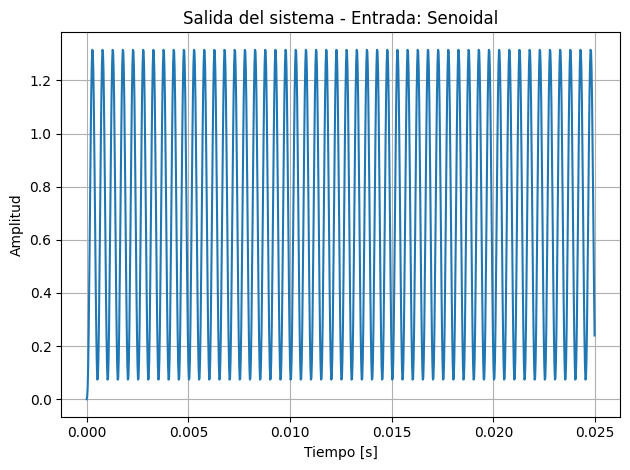


 Potencia de salida Senoidal:  0.5

 Energía de salida Senoidal:  500.0


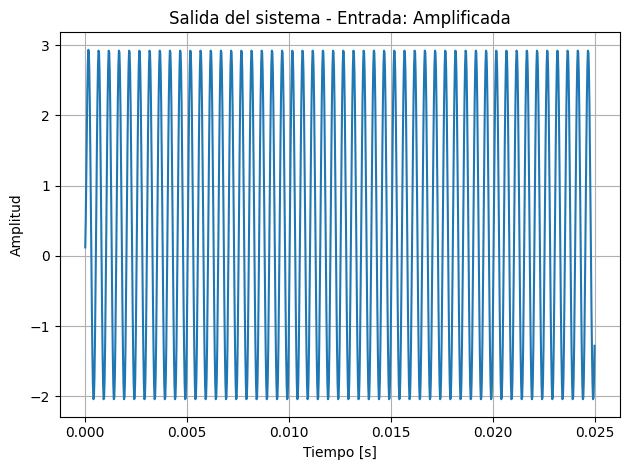


 Potencia de salida Amplificada:  7.999999999999998

 Energía de salida Amplificada:  7999.999999999998


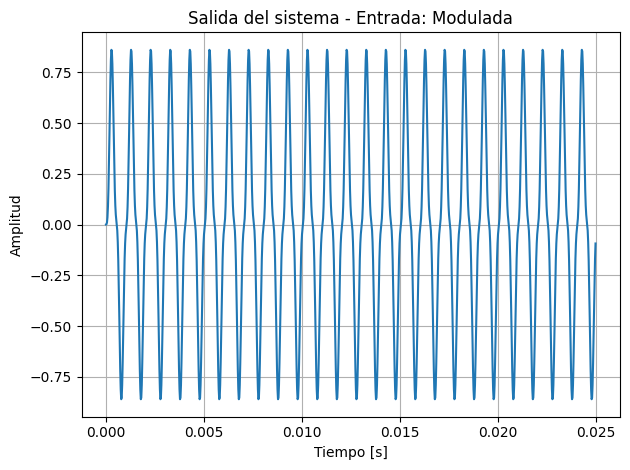


 Potencia de salida Modulada:  0.2500000000000001

 Energía de salida Modulada:  250.00000000000009


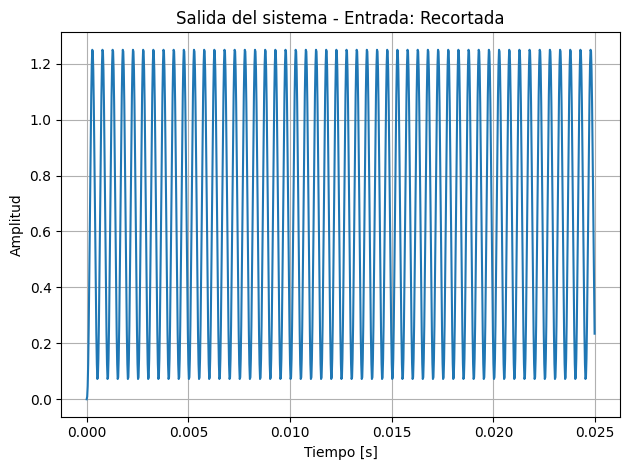


 Potencia de salida Recortada:  0.4440983005625053

 Energía de salida Recortada:  444.0983005625053


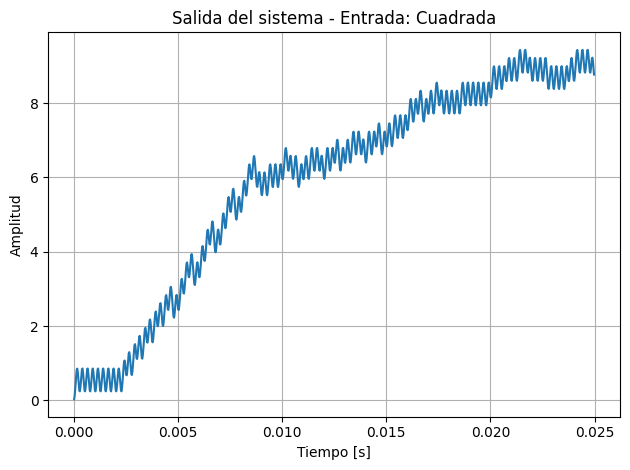


 Potencia de salida Cuadrada:  1.0

 Energía de salida Cuadrada:  1000.0


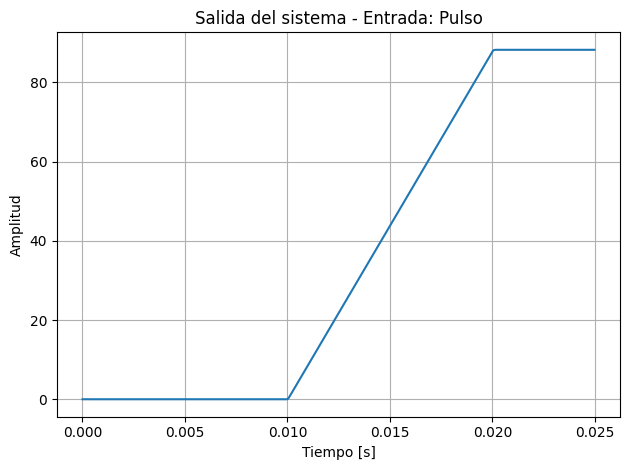


 Potencia de salida Pulso:  0.401

 Energía de salida Pulso:  401.0


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import lfilter
plt.close('all')

# Datos generales de la simulación
def mi_funcion_sen( vmax, dc, ff, ph, nn, fs): 
    
    ts = 1/fs # resolución espectral
    
    tt = np.linspace(0, nn*ts, nn, endpoint=False) # empieza en 0, va hasta 1/df=N*ts y teniendo N muestras para el paso (el endpoint en False hace que no incluya el valor final)
    
    xx = vmax*np.sin(2*np.pi*ff*tt+ph)+dc 
    
    return tt,xx

N = 1000  # cantidad de muestras para todas
fs= 40000 # por Nyquist, como la f que necesitamos es de 2kHz, la fs deberá ser mayor que 4kHz

t,x = mi_funcion_sen(1, 0, 2000, 0, N, fs) # funcion senoidal de 2kHz

t1,x1 = mi_funcion_sen(4, 0, 2000, np.pi/2, N, fs) #señal amplificada por 4 y desfasada pi/2

#Señal modulada
t2,x2 = mi_funcion_sen(1, 0, 1000, 0, N, fs) #funcion senoidal de la mitad de la frecuencia de 2kHz (1kHz)

t3,x3 = t2, x*x2 #señal modulada de 2kHz en amplitud por la de 1kHz

#Señal recortada
potencia = np.mean(x**2) #obtengo la potencia de la señal de 2kHz
pot75 = potencia*0.75 #calculo el 75% de esa señal 
amp=np.sqrt(pot75*2) # obtengo la amplitud correspondiente a ese valor de potencia al 75% con la ecuación A=raiz cuadrada(potencia*2)

x4 = np.clip(x, -amp, amp) #logro recortar en esa amplitud conseguida a la señal de 2kHz 

#Funcion cuadrada 
x5 = signal.square(2*np.pi*4000*t) #señal cuadrada de 4kHz

#Pulso rectangular
t_start = 0.01
t_end = 0.02 
#entre t_start y t_end hay 10ms

x6 = np.zeros_like(t) #crea un array de ceros del mismo tamaño que t
x6[(t >= t_start) & (t <= t_end)] = 1 #seleccionamos los valores de x6 que están entre t_start y t_end y los convertimos en 1

#Aplico sistema LTI para las salidas de estas funciones

# Coeficientes del sistema
b = [0.03, 0.05, 0.03]     # coeficientes de entrada (numerador)
a = [1, -1.5, 0.5]         # coeficientes de salida (denominador)

x_lista = [x, x1, x3, x4, x5, x6]  # tus señales del TS1
nombres = ['Senoidal', 'Amplificada', 'Modulada', 'Recortada', 'Cuadrada', 'Pulso']

for i, x_señal in enumerate(x_lista):
    y_salida = lfilter(b, a, x_señal)
    potencia = np.mean(np.abs(x_señal)**2)
    energia = np.sum(np.abs(x_señal)**2)
    
    plt.figure()
    plt.plot(t, y_salida)
    plt.title(f'Salida del sistema - Entrada: {nombres[i]}')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"\n Potencia de salida {nombres[i]}: ", potencia) #adimensional
    print(f"\n Energía de salida {nombres[i]}: ", energia) #adimensional


- En el caso de la senoidal de 2kHz, se puede apreciar que su valor medio dejó de ser *0V* y pasó a valer *0.5V* aproximadamente. Su amplitud varió a *0.5V* y tuvo un desfase de *-π/2*. Esto quiere decir que la atenúo, la desplazó verticalmente (una especie de *offset*) y la desfasó. Esto mismo sucedió para la senoidal recortada en potencia.

- Para la señal senoidal amplificada de 2 kHz, también se puede observar que el filtro la atenúo, ya que su amplitud disminuyó aproximadamente a la mitad.

- Por otro lado, para la señal modulada en amplitud, el filtro actúa diferente para cada frecuencia. Por lo tanto, a la salida, se conservan las dos componentes, pero con distinta proporcion relativa (uno de los picos se suaviza bastante, quedando más distorsionada).

- En cuanto a la onda cuadrada, no solo pasó a ser una onda senoidal, sino que cada vez se va desplazando más hacia arriba, como si creciera con el tiempo. El valor máximo llegó a ser diez veces más alto que sin el filtro.

- Por último, para el pulso rectangular, el filtro actúa suavizando el cambio brusco. No se trata más de una subida vertical abrupta, sino que pasa a ser una rampa. 



### Respuesta al impulso

La respuesta al impulso $h[n]$ es la salida del sistema ante un impulso unitario $\delta[n]$. Esta respuesta caracteriza completamente un sistema LTI, ya que cualquier señal de entrada puede representarse como una suma de impulsos ponderados (por lo tanto, equivale a saber cómo se comporta el sistema para cualquier entrada).  

En esta experiencia, $h[n]$ se calculó aplicando *lfilter* a un vector *delta* definido como:
\begin{equation}
\delta[n] = 
\begin{cases}
1, & n = 0 \\
0, & n \neq 0
\end{cases}
\end{equation}

La forma de $h[n]$ refleja la dinámica del sistema: el pico inicial indica la contribución inmediata de la entrada, mientras que los valores siguientes muestran cómo los coeficientes de retroalimentación afectan la señal en los instantes posteriores. 

Además, una propiedad fundamental de los sistemas LTI es que, la salida para cualquier señal de entrada $x[n]$, puede obtenerse como la convolución de $x[n]$ con la respuesta al impulso $h[n]$ del sistema:
\begin{equation}
y[n] = (x * h)[n] = \sum_{k=0}^{N-1} x[k] \, h[n-k]
\end{equation}

Para validar los resultados obtenidos con *lfilter*, se calculó la salida de la señal senoidal de *2KHz* mediante convolución con $h[n]$ y se comparó con la salida directa de la ecuación en diferencias. Esta convolución evidencia, prácticamente, una ecuación en diferencias como la especificada líneas arriba.

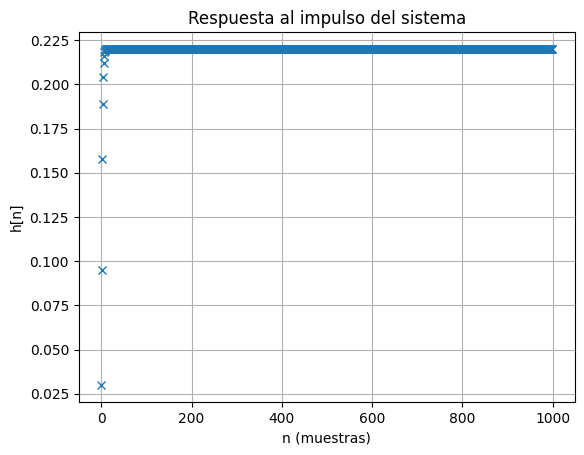

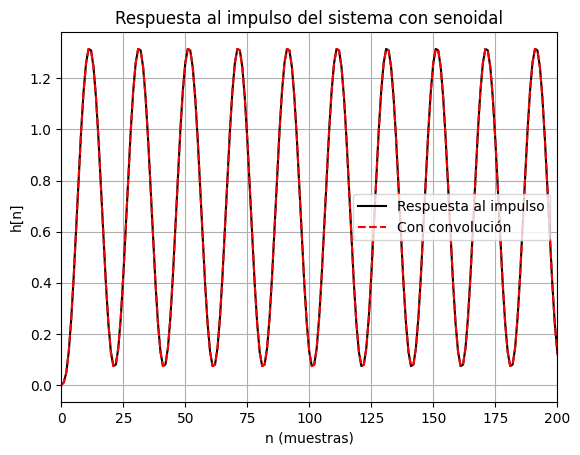

In [22]:
# Impulso de longitud N
delta = np.zeros(N)
delta[0] = 1  # delta[n]

# Obtener respuesta al impulso
h = lfilter(b, a, delta)

# Graficar h[n]
plt.figure()
plt.clf()
plt.plot(np.arange(len(h)), h, 'x')
plt.title('Respuesta al impulso del sistema')
plt.xlabel('n (muestras)')
plt.ylabel('h[n]')
plt.grid(True)
plt.show()

#Teniendo h, puedo obtener la respuesta al impulso para cualquier salida
#Uso convolucion en vez de lfilter para la señal senoidal de 2kHz
x_imp = np.convolve(x, h)[:N] #trunco a N

# Graficar h[n]
plt.figure()
plt.clf()
plt.plot(np.arange(len(h)), x_imp, color='black', label='Respuesta al impulso') #con respuesta al impulso y convolución
plt.plot(np.arange(len(x)), lfilter(b,a,x), color='red', linestyle='--', label='Con convolución') #con el sistema solo para comparar
plt.title('Respuesta al impulso del sistema con senoidal')
plt.xlabel('n (muestras)')
plt.ylabel('h[n]')
plt.xlim(0, 200)
plt.grid(True)
plt.legend()
plt.show()


En la respuesta al impulso del sistema, en el gráfico de $h[n]$, se observa que sube rápidamente y, luego, se estabiliza en un valor constante. Esto se debe a que, el sistema dado, tiene un polo en *1*, generando que recuerde "indefinidamente" lo que ingresó (siendo el caso más especial de *p=1*). Es decir, se produce un escalón que perdura hasta el final (no decae ni "explota"). Cabe destacar que, aunque se hubiera colocado el *delta* en otro valor, la respuesta continuaría siendo la misma, pero con una demora (ya que es un sistema invariante en el tiempo).

En el segundo gráfico, se puede apreciar la comparación de calcular la salida de una senoidal con la ecuación en diferencias y, por otro lado, con la respuesta al impulso. Se puede observar que ambas coinciden, confirmando la consistencia del método y demostrando que la respuesta al impulso contiene toda la información necesaria para predecir la salida del sistema frente a cualquier entrada, ya que la ecuación en diferencias implementa la misma convolución.


### Respuesta al impulso para otros sistemas

En este apartado, se presentan dos sistemas más para calcular su respuesta al impulso:

\begin{equation}
(1) y[n] = x[n] + 3 \cdot x[n - 10]
\end{equation}
\begin{equation}
(2) y[n] = x[n] + 3 \cdot y[n - 10]
\end{equation}

Posteriormente, con las respuestas al impulso ya obtenidas, se calculó la salida a través de ella para una entrada senoidal.


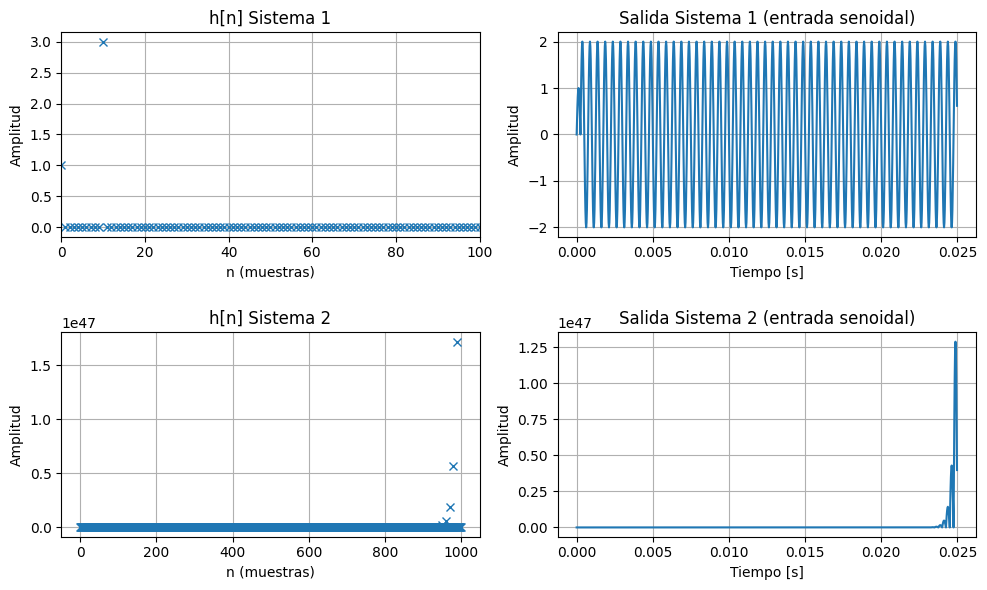

In [24]:
# Sistema 1: y[n] = x[n] + 3 x[n-10]
b1 = np.zeros(11)
b1[0] = 1
b1[10] = 3
a1 = [1]

# Respuesta al impulso
delta = np.zeros(N)
delta[0] = 1
h1 = lfilter(b1, a1, delta)

# Salida a la senoidal
y1 = lfilter(b1, a1, x)


# Sistema 2: y[n] = x[n] + 3 y[n-10]
b2 = [1]
a2 = np.zeros(11)
a2[0] = 1
a2[10] = -3

# Respuesta al impulso
h2 = lfilter(b2, a2, delta)

# Salida a la senoidal
y2 = lfilter(b2, a2, x)


# Gráficos

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.plot(np.arange(len(h)), h1, 'x')
plt.title('h[n] Sistema 1')
plt.xlabel('n (muestras)')
plt.ylabel('Amplitud')
plt.xlim(0, 100)
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(t, y1)
plt.title('Salida Sistema 1 (entrada senoidal)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(np.arange(len(h)), h2, 'x')
plt.title('h[n] Sistema 2')
plt.xlabel('n (muestras)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(t, y2)
plt.title('Salida Sistema 2 (entrada senoidal)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

En el primer caso, el sistema genera dos impulsos en la salida como respuesta al *delta* unitario, uno en *n=0* de amplitud *1* y otro en *n=10* de amplitud *3*. Se reproduce la entrada original inmediatamente, y además genera una réplica retardada 10 muestras después, con una ganancia de 3. Visualmente, se percibe como si hubiera “eco” de la señal. 

Habiendo colocado como entrada a la senoidal de *2kHz*, se puede apreciar que se amplifica al doble de su amplitud.

En el segundo caso, la respuesta al impulso es más compleja, porque el término *y[n−10]* genera que la salida se retroalimente. El sistema no produce solo dos impulsos, sino una serie infinita de impulsos, separados cada 10 muestras y con amplitud creciente (por el factor *3* que multiplica a la realimentación). Esto se debe a que cuenta con un polo mayor a *1*, causando que sea inestable y explote al infinito, evidenciando números muy grandes en el gráfico (escala *1e47*). Todas estas cuestiones lo convierte en un sistema recursivo.

En cuanto a la entrada senoidal de *2kHz*, se puede observar que se pierde la forma senoidal, ya que la amplitud crece exponencialmente cada 10 muestras, evidenciando los picos más representativos sobre el final.

# Conclusiones
- A través de la utilización de diferentes señales de entrada, se pudo observar cómo un sistema lineal e invariante en el tiempo (LTI) transforma una señal de acuerdo a sus coeficientes de entrada y salida. Se puedo visibilizar que la salida de un sistema LTI depende no solo de la señal manejada, sino también de valores pasados de la entrada y, si el sistema es recursivo, de valores pasados de la propia salida.
- Se pudo contrastar que, la respuesta al impulso, permite predecir cómo reaccionará el sistema ante cualquier entrada, mediante la convolución. Comparando la salida obtenida con *lfilter* y con la convolución usando la respuesta al impulso, se confirmó que ambos métodos generan resultados equivalentes, reforzando el concepto de que la respuesta al impulso es una herramienta fundamental para analizar sistemas LTI.
- Con los distintos sistemas LTI, se analizó que, para señales senoidales, se suele modificar la amplitud y la fase. En cambio, para señales no senoidales, se las suaviza o se transforma su forma, mostrando la capacidad del sistema de filtrar o modificar la señal en el tiempo.
- Por último, empleando un sistema recursivo, se pudo advertir cómo la inestabilidad genera una salida que crece rápidamente y presenta picos muy grandes, dependiendo del retardo y la ganancia de la retroalimentación. Esta cuestión llama a la reflexión de lo importante que puede ser analizar la estabilidad de un sistema para saber qué tipo de entrada encaja correctamente (en este caso, las señales prolongadas en el tiempo o de gran amplitud no serían de las más recomendadas).

# Bonus

### Modelo Windkessel

El modelo Windkessel se describe mediante la siguiente ecuación diferencial:

\begin{equation}
C \frac{dP}{dt} + \frac{1}{R} P = Q(t)
\end{equation}

donde:  
- $P(t)$: presión arterial
- $Q(t)$: flujo de entrada (por ejemplo, una función senoidal para representar el latido)
- $C$: compliance (capacidad de las arterias para expandirse)
- $R$: resistencia vascular

Se puede discretizar la ecuación a través de Euler

Sea un paso temporal $dt$. Aproximamos la derivada por una diferencia finita entre dos instantes consecutivos:

\begin{equation}
\frac{dP}{dt} \approx \frac{P[n+1] - P[n]}{dt}
\end{equation}

Sustituyendo en la ecuación diferencial:

\begin{equation}
C \frac{P[n+1] - P[n]}{dt} + \frac{1}{R} P[n] = Q[n]
\end{equation}

Despejando $P[n+1]$:

\begin{equation}
P[n+1] = P[n] + \frac{dt}{C} \Big( Q[n] - \frac{1}{R} P[n] \Big)
\end{equation}

Esta es la ecuación recursiva que se puede implementar directamente.

Para arterias grandes (como la aorta) se consideran valores aproximados:  

- $C \sim 1.5\ \text{mL/mmHg}$
- $R \sim 1.0\ \text{mmHg·s/mL}$

El flujo $Q(t)$ puede simularse como un *pulso senoidal*:

\begin{equation}
Q(t) = Q_0 \cdot \sin(2 \pi f t) \quad \text{con } f = 1\ \text{Hz (60 lpm)}
\end{equation}


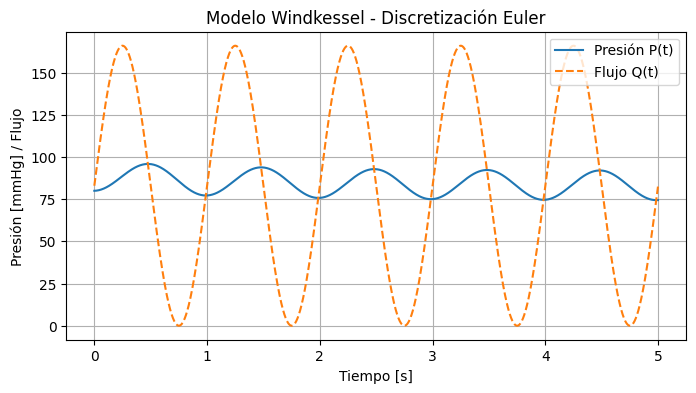

In [19]:
# Parámetros del sistema
C = 1.5  # mL/mmHg
R = 1.0   # mmHg·s/mL
dt = 0.001  # paso temporal
N = 5000
fs = 1/dt

# Flujo de entrada (Q), pulso senoidal
Q0 = 83  # amplitud del flujo sanguíneo en mL/s
tt, Q = mi_funcion_sen(vmax=Q0, dc=83, ff=1, ph=0, nn=N, fs=fs)
Q[Q < 0] = 0  # flujo no negativo

# Inicialización
P = np.zeros(N)
P[0] = 80  # presión inicial, mmHg valor típico de presión arterial, sino Python lo inicializará en 0 y no tiene sentido

# Recurrencia
for n in range(N-1):
    P[n+1] = P[n] + (dt/C) * (Q[n] - P[n]/R)

# Graficar
plt.figure(figsize=(8,4))
plt.plot(tt, P, label='Presión P(t)')
plt.plot(tt, Q, '--', label='Flujo Q(t)')  
plt.xlabel('Tiempo [s]')
plt.ylabel('Presión [mmHg] / Flujo')
plt.title('Modelo Windkessel - Discretización Euler')
plt.grid(True)
plt.legend()
plt.show()


En el gráfico, se pueden apreciar ambas curvas de la presión arterial y el flujo sanguíneo. La primera comienza en *80 mmHg* y oscila alrededor de ese valor siguiendo el ritmo del flujo, pero filtrada por el efecto del sistema Windkessel. Mientras tanto, la segunda, es una senoidal que alcanza los *160 mL/s* aproximadamente, lo cual es coherente dentro de lo funcional, ya que el gasto cardíaco típico es de *83 mL/s* en promedio y, con la pulsación, los picos pueden duplicar ese valor.

Por lo tanto, el modelo Windkessel funciona como un filtro dinámico: el flujo pulsátil de entrada *Q(t)* se transforma en una presión *P(t)* más suave, con menor amplitud relativa de oscilaciones. La compliance *C* (elasticidad) almacena energía durante la fase de eyección (cuando *Q(t)* es alto) y la libera cuando el flujo baja, manteniendo la presión más estable. La resistencia *R* hace que la presión nunca crezca indefinidamente, sino que tienda a un equilibrio.

Fisiológicamente, esto representa cómo el sistema arterial evita que la presión caiga a cero entre latidos, asegurando flujo continuo a los tejidos.

### Cuestiones a tener en cuenta
- Nuevamente, se me hizo un poco cuesta arriba el trabajo. No me siento para nada conforme con lo realizado. 
- Siento que en algunos casos no tenía los conocimientos apropiados para realizar los ejercicios, no sé si me habrá pasado solo a mí. Tuve que buscar bastantes conceptos y me encontré con muchas cuestiones complejas, que no estaba seguro si era a lo que se apuntaba analizar, así que decidí simplificarlo lo más que pude (no se si algunas cosas las obvié por demás, pero sino se me hacía muy difícil avanzar). 
- Quedo a la espera de las correcciones para seguir mejorándolo.